In [6]:
import fragment_analyzer
import matplotlib.pyplot as plt
import yaml
from yaml.loader import SafeLoader

with open('config/method_channel_definition.yaml') as f:
    data = yaml.load(f, Loader=SafeLoader)
    print(data)

# Looking at a fsa file that used the LIZ ladder

In [3]:




fsa = fragment_analyzer.FsaFile("demo/4062_Dx/3_PRT_2_4062_C02_Dx.fsa")
ladder_assigner = fragment_analyzer.PeakLadderAssigner(fsa)
model = fragment_analyzer.FitLadderModel(fsa, ladder_assigner)

In [4]:
# Information about the fsa file
fsa


            FsaFile-object with following parameters:
            
            File: demo\4062_Dx\3_PRT_2_4062_C02_Dx.fsa
            Filename: 3_PRT_2_4062_C02_Dx.fsa
            Size standard channel: DATA205
            Ladder name: LIZ
            Number of ladder steps: 35
            Minimum interpeak distance: 30
            Minimum height: 100
            Minimum Ladder trace distance: 300
            Maximum peak count: 38
            Normalized data: False
            Trace Channel: DATA1
            Ladder Sizes: [ 20  40  60  80 100 114 120 140 160 180 200 214 220 240 260 280 300 314
 320 340 360 380 400 414 420 440 460 480 500 514 520 540 560 580 600]
            

# Plot the ladder and the fit of the model

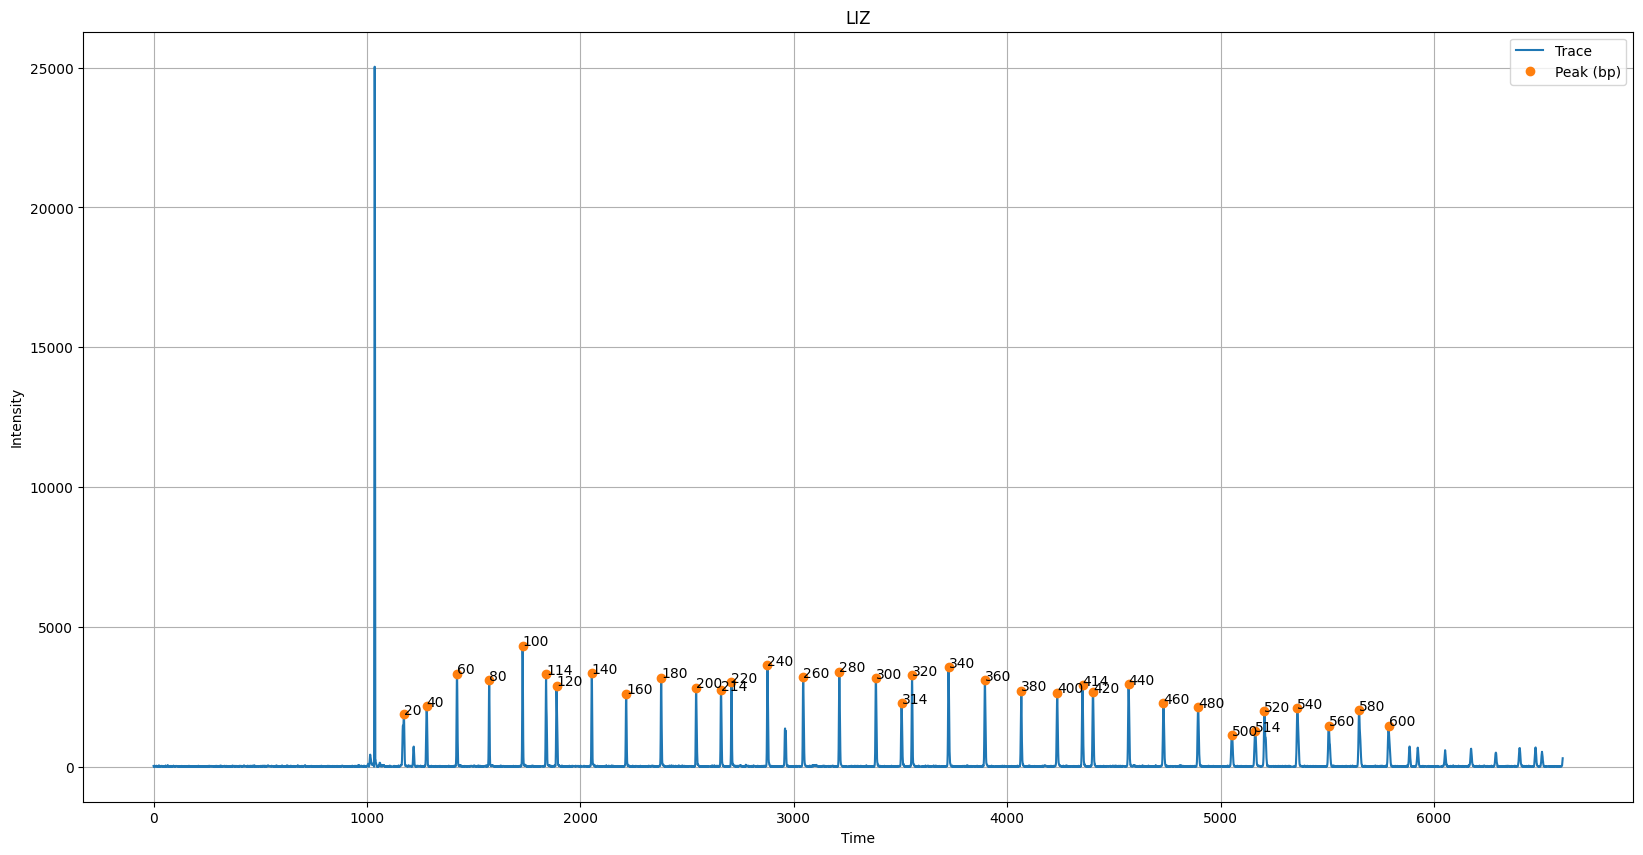

In [11]:
plt.ioff()
ladder_plot = fragment_analyzer.PlotLadder(model)

ladder_plot.plot_ladder_peaks

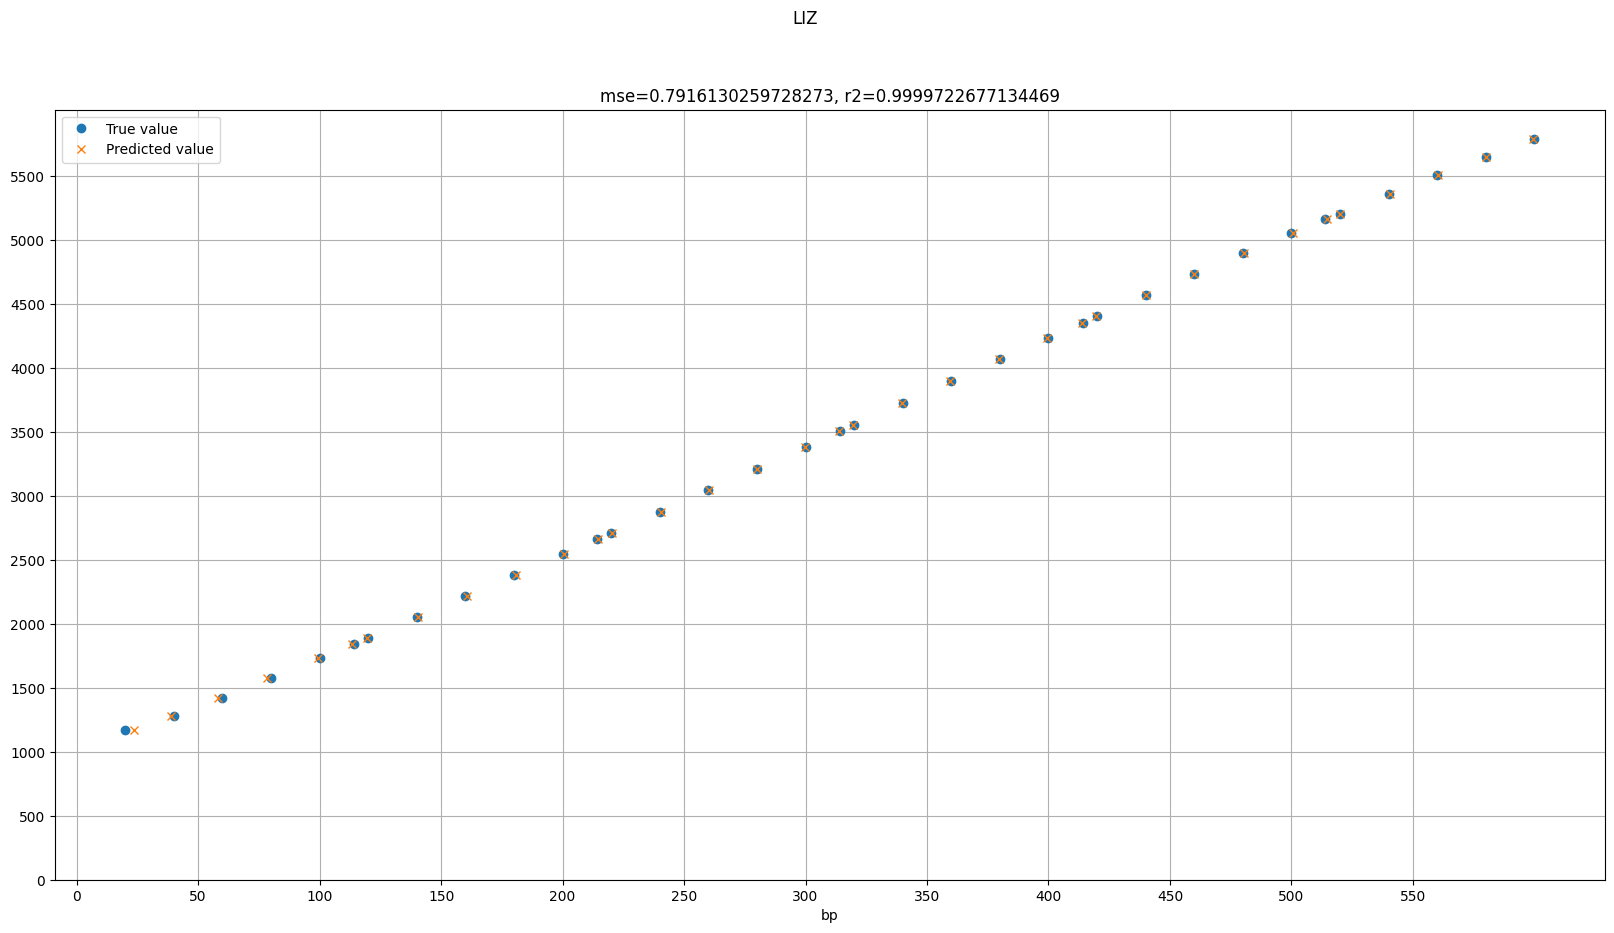

In [12]:
ladder_plot.plot_model_fit

# Look at the peak areas

In [6]:
peak_areas = fragment_analyzer.PeakArea(model, peak_finding_model="gauss")

2 peaks found in 3_PRT_2_4062_C02_Dx.fsa


In [7]:
peak_areas.peak_position_area_dataframe

,peak_height,basepairs,fitted_peak_height,model,area,peak_name,file_name,quotient
0,19744,228.484534,19691.648722,gauss,8961.358406,Peak 1,3_PRT_2_4062_C02_Dx.fsa,0.537413
0,10640,232.982984,10605.251596,gauss,4815.953755,Peak 2,3_PRT_2_4062_C02_Dx.fsa,0.537413


# Look at the fit report

In [19]:
for r in peak_areas.fit_report:
    print(r)

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 17
    # variables        = 3
    chi-square         = 910635.765
    reduced chi-square = 65045.4118
    Akaike info crit   = 191.107644
    Bayesian info crit = 193.607284
    R-squared          = 0.99871701
[[Variables]]
    amplitude:  8961.35841 +/- 85.6883917 (0.96%) (init = 10438.17)
    center:     228.513780 +/- 0.00197803 (0.00%) (init = 228.5438)
    sigma:      0.17914916 +/- 0.00197803 (1.10%) (init = 0.1777466)
    fwhm:       0.42186403 +/- 0.00465790 (1.10%) == '2.3548200*sigma'
    height:     19955.8003 +/- 190.817089 (0.96%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 16
    # variables        = 3
    chi-square      

# Plot the peaks

In [8]:
peak_plots = fragment_analyzer.PlotPeakArea(peak_areas)

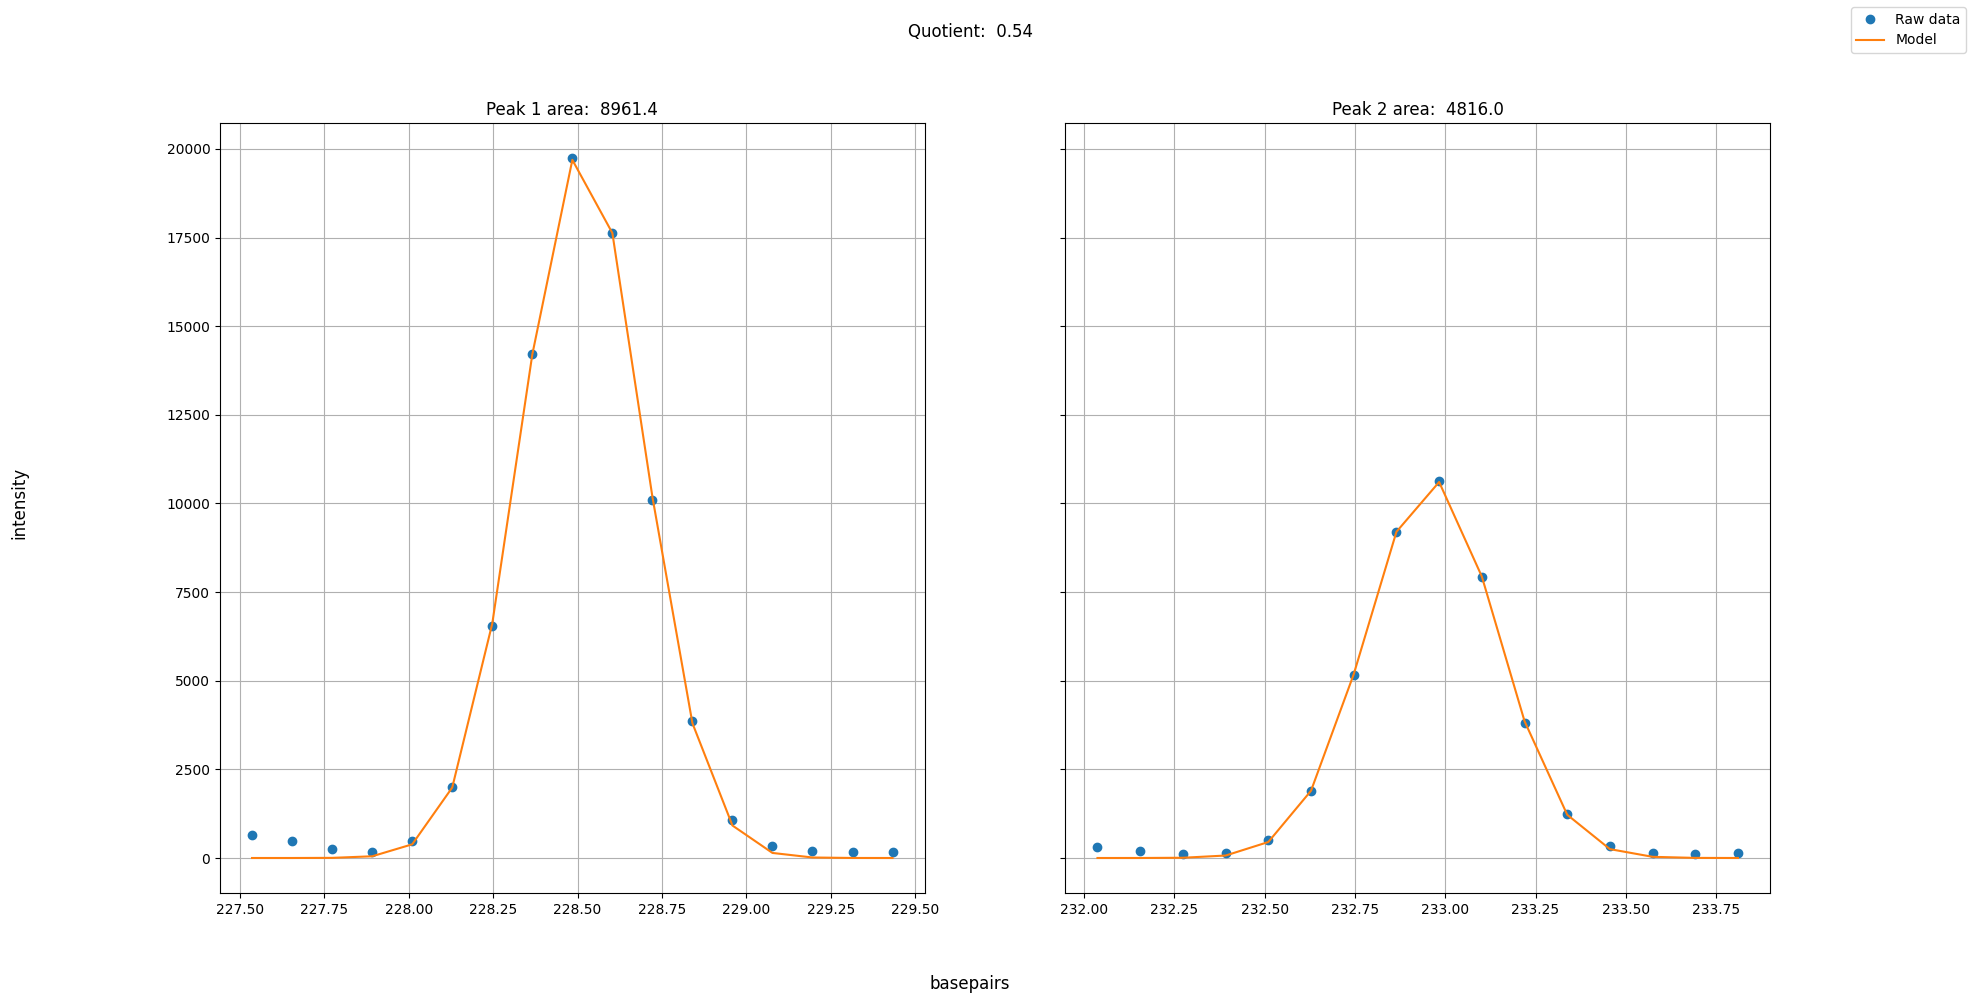

In [13]:
peak_plots.plot_areas

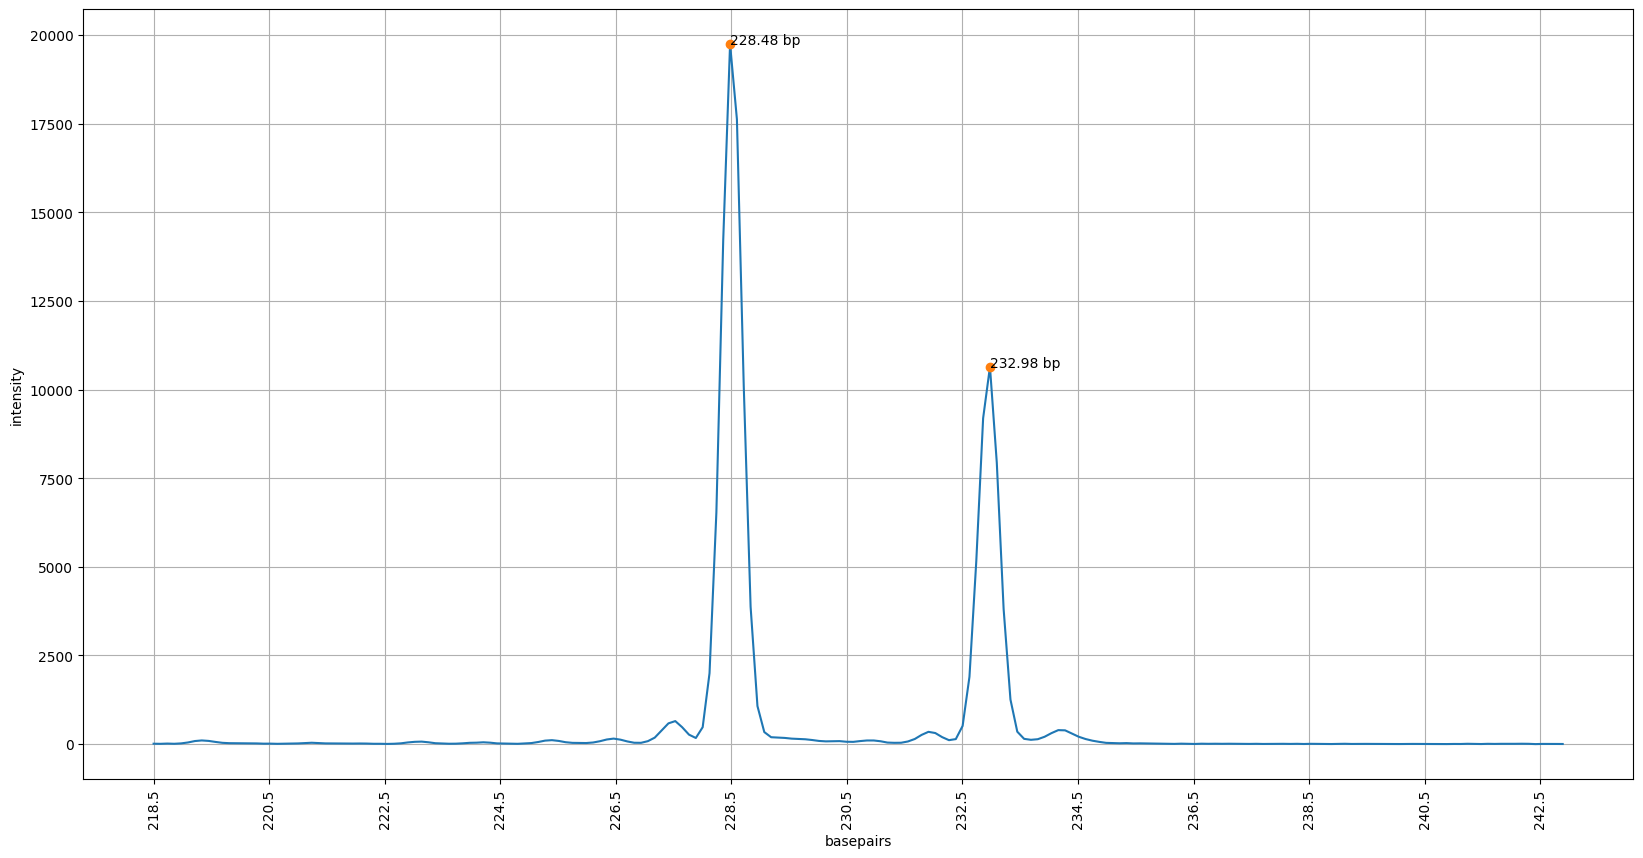

In [14]:
peak_plots.plot_peaks

# Look at fsa with ROX

In [15]:
fsa = fragment_analyzer.FsaFile("demo/Coriell Ctrl 10-B05-2022-10-06-16-17-11-01.fsa", "ROX")
ladder_assigner = fragment_analyzer.PeakLadderAssigner(fsa)
model = fragment_analyzer.FitLadderModel(fsa, ladder_assigner)

In [16]:
ladder_plot = fragment_analyzer.PlotLadder(model)

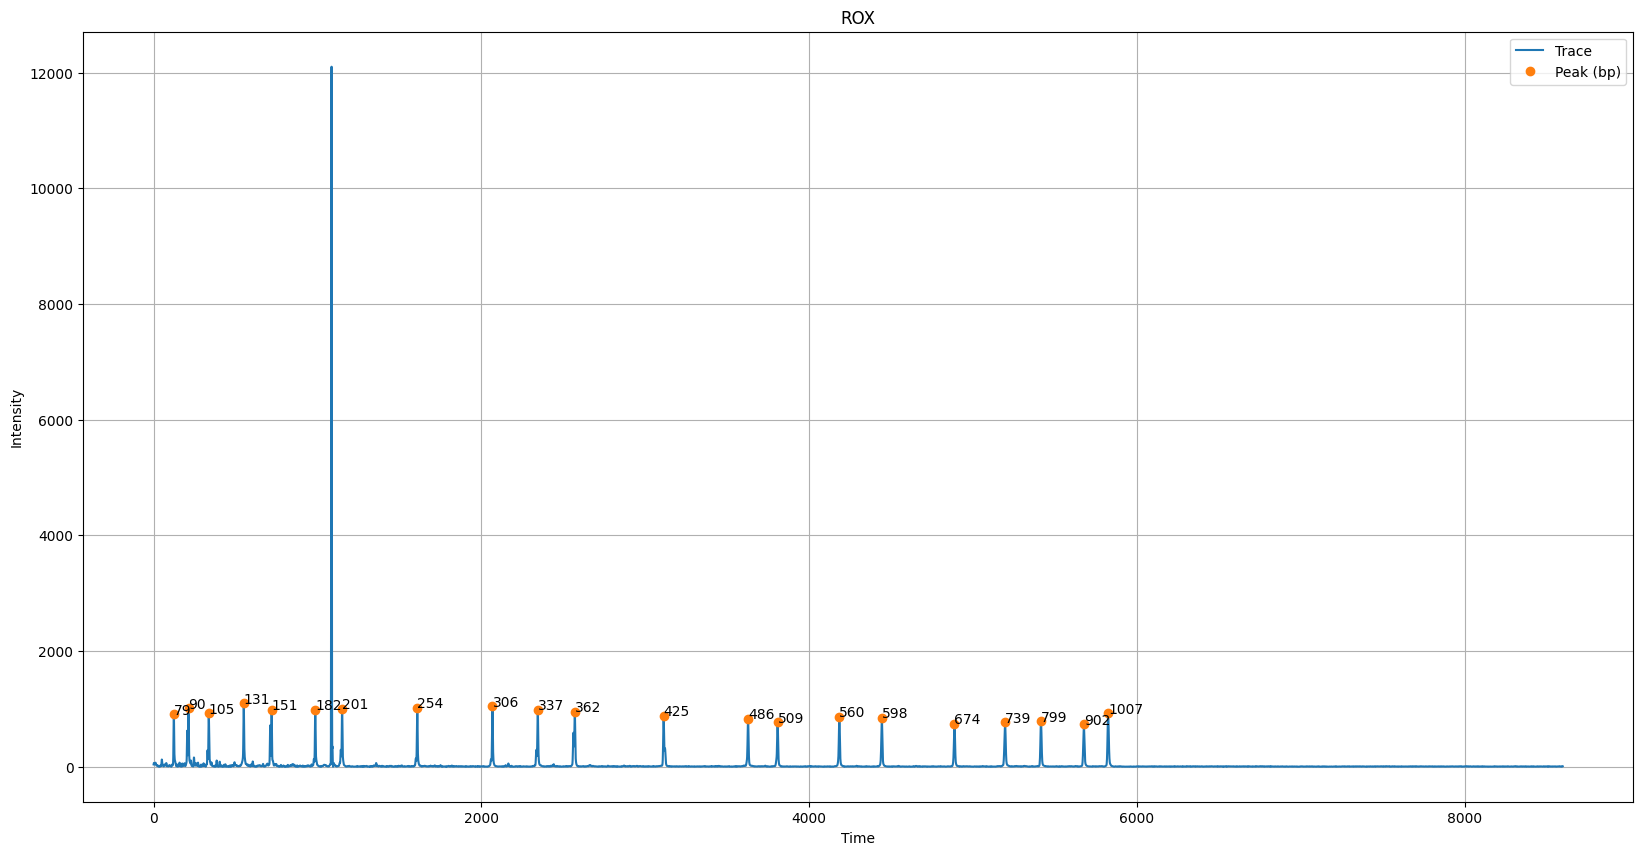

In [17]:
ladder_plot.plot_ladder_peaks

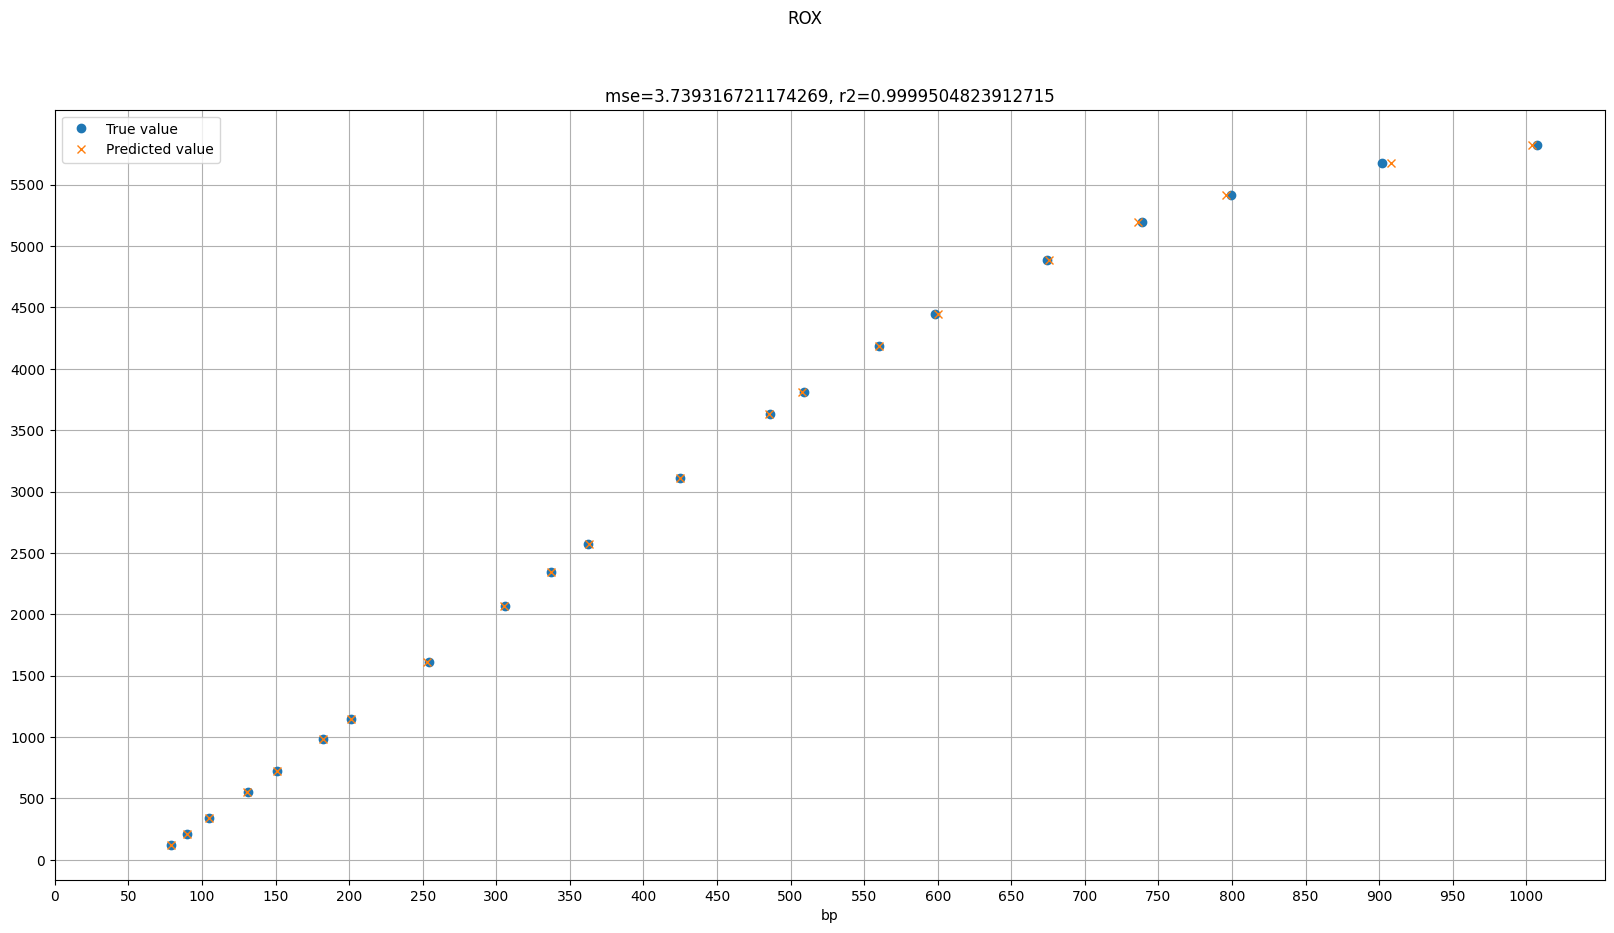

In [18]:
ladder_plot.plot_model_fit